<font color='blue'><font size ='9'> HiperGator Computing Resource Calculator

This module will learn the basic components for machine learning, including Data processing and Modeling

## The problem: request computing resource inappropriately
The HiperGator users conducting bioinformatics tend to request more computing resources than their actual needs, resulting in the unnecessary occupy of computing resource; or request less and hence waste their own time.

## The solution: Machine Learning
Create a machine learning model to predict the computing time, for the certain input CPU and MEM.

# <font color='blue'><font size ='6'> 1. Data Processing

### Section 1 objective:
* Import libraries
* Learn the Pandas basics
* Exploratory Data Analysis (EDA)
* Feature Engineering

## 1.1 Import libraries

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2 Pandas basics

### 1.2.1 Load Dataset

In [ ]:
df = pd.read_excel('drive/MyDrive/Data/hpg_cal/hpg_cal_data.xlsx')
# df = pd.read_excel('drive/MyDrive/Data/hpg_cal/hpg_cal_data.xlsx', nrows = 300)

**Notes**  
1. **read_excel** is for xsl and xslx files. Other functions like **read_csv** for csv file   
2. **nrows=300** means we only read the first 300 rows from the file.

### 1.2.2 Have a glance of the data

In [ ]:
df

,search_type,database,file_size,cpu,mem,Time (h:m:s)
0,blastn,nt,169,1,1.0,0:8:16
1,blastn,nt,169,1,2.0,0:4:58
2,blastn,nt,169,1,4.0,0:5:36
3,blastn,nt,169,1,8.0,0:4:53
4,blastn,nt,169,1,16.0,0:8:53
...,...,...,...,...,...,...
559,diam_blastx,nr,1100,2,128.0,23:46:54
560,diam_blastx,nr,1100,4,16.0,17:27:54
561,diam_blastx,nr,1100,4,32.0,22:45:2
562,diam_blastx,nr,1100,4,64.0,19:34:43


In [ ]:
df.head()

,search_type,database,file_size,cpu,mem,Time (h:m:s)
0,blastn,nt,169,1,1.0,0:8:16
1,blastn,nt,169,1,2.0,0:4:58
2,blastn,nt,169,1,4.0,0:5:36
3,blastn,nt,169,1,8.0,0:4:53
4,blastn,nt,169,1,16.0,0:8:53


**Notes**
1. You can use an integer as an argument to specify the number of rows to show.
2. Try df.tail()

In [ ]:
df.tail()

,search_type,database,file_size,cpu,mem,Time (h:m:s)
559,diam_blastx,nr,1100,2,128.0,23:46:54
560,diam_blastx,nr,1100,4,16.0,17:27:54
561,diam_blastx,nr,1100,4,32.0,22:45:2
562,diam_blastx,nr,1100,4,64.0,19:34:43
563,diam_blastx,nr,1100,4,128.0,20:28:27


In [ ]:
# Get names of columns
df.columns

Index(['search_type', 'database', 'file_size', 'cpu', 'mem', 'Time (h:m:s)'], dtype='object')

In [ ]:
# Get indices
df.index

RangeIndex(start=0, stop=564, step=1)

<font color='red'>**Exercise:**</font> Get the number of rows and number of columns.

In [ ]:
# TODO: Get the number of rows


In [ ]:
# TODO: Get the number of columns


<font color='green'>**Solutions:**</font>

Click on the 'Show code' below to show the solution.

In [ ]:
# @title solution1
len(df.index)

564

In [ ]:
# @title solution2
len(df.columns)

6

In [ ]:
df.shape

(564, 6)

### 1.2.3 Get a slice of the dataframe

#### Get a column

In [ ]:
# use dot
df.cpu.head()

0    1
1    1
2    1
3    1
4    1
Name: cpu, dtype: int64

In [ ]:
# use []
df['cpu'].head()

0    1
1    1
2    1
3    1
4    1
Name: cpu, dtype: int64

**Notes**
1. Dot method is more commonly used as it is more convenient, but not always feasible.
2. What if there is space in a column name? for example 'Time (h:m:s)'

#### Get a few columns

In [ ]:
df[['file_size', 'cpu', 'mem']].head()

,file_size,cpu,mem
0,169,1,1.0
1,169,1,2.0
2,169,1,4.0
3,169,1,8.0
4,169,1,16.0


<font color='red'>Question:</font> What is the difference between **df["cpu"]** and **df[["cpu"]]**? Use **type** to find out.

In [ ]:
type(df["cpu"])

pandas.core.series.Series

In [ ]:
df["cpu"]

0      1
1      1
2      1
3      1
4      1
      ..
559    2
560    4
561    4
562    4
563    4
Name: cpu, Length: 564, dtype: int64

In [ ]:
type(df[["cpu"]])

pandas.core.frame.DataFrame

In [ ]:
df[["cpu"]]

,cpu
0,1
1,1
2,1
3,1
4,1
...,...
559,2
560,4
561,4
562,4


**Notes**
1. Pandas series is one-dimensional indexed data structure. A Series can be considered as a list with index
2. A Series can only contain single list with index, whereas dataframe can be made of more than one series or we can say that a dataframe is a collection of series.

#### Get some rows and all columns

In [ ]:
df.iloc[5:10:1,:] # start(include):stop(exclude):step(default=1). use "," to separate row and column
# df.iloc[5:10,:]
# df.iloc[5:10,]

,search_type,database,file_size,cpu,mem,Time (h:m:s)
5,blastn,nt,169,1,32.0,0:6:30
6,blastn,nt,169,1,64.0,0:5:53
7,blastn,nt,169,1,128.0,0:3:58
8,blastn,nt,169,2,1.0,0:5:45
9,blastn,nt,169,2,2.0,0:3:45


In [ ]:
df.iloc[5:15:2,:]

,search_type,database,file_size,cpu,mem,Time (h:m:s)
5,blastn,nt,169,1,32.0,0:6:30
7,blastn,nt,169,1,128.0,0:3:58
9,blastn,nt,169,2,2.0,0:3:45
11,blastn,nt,169,2,8.0,0:8:30
13,blastn,nt,169,2,32.0,0:5:12


In [ ]:
df.iloc[[1,3,5,7],:]

,search_type,database,file_size,cpu,mem,Time (h:m:s)
1,blastn,nt,169,1,2.0,0:4:58
3,blastn,nt,169,1,8.0,0:4:53
5,blastn,nt,169,1,32.0,0:6:30
7,blastn,nt,169,1,128.0,0:3:58


#### Get some rows and some columns

In [ ]:
df.iloc[5:15,1:6:2]

,database,cpu,Time (h:m:s)
5,nt,1,0:6:30
6,nt,1,0:5:53
7,nt,1,0:3:58
8,nt,2,0:5:45
9,nt,2,0:3:45
10,nt,2,0:4:22
11,nt,2,0:8:30
12,nt,2,0:4:51
13,nt,2,0:5:12
14,nt,2,0:6:29


In [ ]:
df.loc[5:15,"database":"Time (h:m:s)":2]

,database,cpu,Time (h:m:s)
5,nt,1,0:6:30
6,nt,1,0:5:53
7,nt,1,0:3:58
8,nt,2,0:5:45
9,nt,2,0:3:45
10,nt,2,0:4:22
11,nt,2,0:8:30
12,nt,2,0:4:51
13,nt,2,0:5:12
14,nt,2,0:6:29


<font color='red'>Think about it:</font> What is the difference between **iloc** and **loc**?

1. iloc[ ] is **integer position** based;
2. loc[ ] is **label** based.

**Notes**
1. Be very careful that iloc excludes ending row/column while loc includes ending row/column.
2. loc is more commonly used as index could be non-continous, or even non-integer, non-numerical.
3. Refer to this page for examples: https://stackoverflow.com/questions/31593201/how-are-iloc-and-loc-different
4. What if there are duplicate indexes?

In [ ]:
s = pd.Series(list("ABCDEF"), index=[10, 10, 17.1, 3, 8, "f"])
s

10      A
10      B
17.1    C
3       D
8       E
f       F
dtype: object

In [ ]:
s.loc[17.1]

'C'

In [ ]:
s.loc[10]

10.0    A
10.0    B
dtype: object

#### Get rows with filters

In [ ]:
df[df.cpu == 2].head()

,search_type,database,file_size,cpu,mem,Time (h:m:s)
8,blastn,nt,169,2,1.0,0:5:45
9,blastn,nt,169,2,2.0,0:3:45
10,blastn,nt,169,2,4.0,0:4:22
11,blastn,nt,169,2,8.0,0:8:30
12,blastn,nt,169,2,16.0,0:4:51


In [ ]:
df[(df.cpu == 4) | (df.mem == 8)].head()

,search_type,database,file_size,cpu,mem,Time (h:m:s)
3,blastn,nt,169,1,8.0,0:4:53
11,blastn,nt,169,2,8.0,0:8:30
16,blastn,nt,169,4,1.0,0:6:31
17,blastn,nt,169,4,2.0,0:5:28
18,blastn,nt,169,4,4.0,0:6:46


**Notes**
1. '&' and '|' are AND and OR operators in pandas, respectively.

<font color='red'>Exercise:</font> Get a sub dataframe with columns "search_type", "database", and "file_size". Filter out the rows in which "file_size" values are greater than 1000 but less than 2000. Hint: use >, &, <  operators.

Click on the 'Show code' below to show the solution.

In [ ]:
# @title solution
df[(df.file_size > 1000) & (df.file_size < 2000) ][["search_type", "database", "file_size"]]

NameError: name 'df' is not defined

## 1.3 Exploratory Data Analysis (EDA)

### 1.3.1 Dtype

In [ ]:
df.database.dtype

dtype('O')

**Notes**
1. dtype is for data type. dtype('O') means this is a Python object. In Pandas, most of the time this means the data type is string or a mix of string, number and/or NaN.
2. You can specify datatypes for columns to more efficiently manage memory: https://vincentteyssier.medium.com/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   search_type   566 non-null    object 
 1   database      566 non-null    object 
 2   file_size     566 non-null    int64  
 3   cpu           566 non-null    int64  
 4   mem           564 non-null    float64
 5   Time (h:m:s)  562 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 26.7+ KB


In [ ]:
df.describe()      # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

,file_size,cpu,mem
count,566.000000,566.000000,564.000000
mean,1018.696113,2.330389,41.589560
std,965.174137,1.251701,45.209091
min,120.000000,1.000000,0.512000
25%,238.000000,1.000000,8.000000
50%,617.000000,2.000000,16.000000
75%,1720.000000,4.000000,64.000000
max,3301.000000,4.000000,256.000000


In [ ]:
df[["search_type", "database", "Time (h:m:s)"]].describe()

,search_type,database,Time (h:m:s)
count,566,566,562
unique,7,2,544
top,blastn,nr,0:22:47
freq,121,288,2


The *top* is the most common value.
The *freq* is the most common value’s frequency.

In [ ]:
df['mem'].count() # number of non-null values

564

In [ ]:
len(df.mem)

566

<font color='red'>Question:</font> What do "count" and "len" do? Why are their results different?

1. count() counts the number of non-NaN rows
2. len() counts the number of all rows including NaN.

### 1.3.2 Transform strings to numerical values

In [ ]:
df

,search_type,database,file_size,cpu,mem,Time (h:m:s)
0,blastn,nt,169,1,1.0,0:8:16
1,blastn,nt,169,1,2.0,0:4:58
2,blastn,nt,169,1,4.0,0:5:36
3,blastn,nt,169,1,8.0,0:4:53
4,blastn,nt,169,1,16.0,0:8:53
...,...,...,...,...,...,...
561,diam_blastx,nr,1100,4,8.0,NaN
562,diam_blastx,nr,1100,4,16.0,17:27:54
563,diam_blastx,nr,1100,4,32.0,22:45:2
564,diam_blastx,nr,1100,4,64.0,19:34:43


Create a funcition to transform a string to a numerical value

In [ ]:
def time2num(x):
    """
    This function transform Time (h:m:s) string to numerical value in hours.
    input: str
    output: float
    """
    if type(x) == str: # only works when x is a string
        time = x.split(':') # split at the ":", resulting in 3 parts indexed at 0, 1, 2
        # print(time[0], time[1], time[2])
        x = float(time[0]) + float(time[1])/60 + float(time[2])/3600  # convert to decimal hours
    return x

In [ ]:
type(np.nan)

float

Test the function

In [ ]:
time2num("20:28:27")

20.474166666666665

Apply the function **elementwise** to the *Time (h:m:s)* column using map().

In [ ]:
df["Time (h:m:s)"].map(time2num)  # https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html

0       0.137778
1       0.082778
2       0.093333
3       0.081389
4       0.148056
         ...    
561          NaN
562    17.465000
563    22.750556
564    19.578611
565    20.474167
Name: Time (h:m:s), Length: 566, dtype: float64

Add the result at **Series** data type to **DataFrame**

In [ ]:
df['time_h'] = df["Time (h:m:s)"].map(time2num)

In [ ]:
df

,search_type,database,file_size,cpu,mem,Time (h:m:s),time_h
0,blastn,nt,169,1,1.0,0:8:16,0.137778
1,blastn,nt,169,1,2.0,0:4:58,0.082778
2,blastn,nt,169,1,4.0,0:5:36,0.093333
3,blastn,nt,169,1,8.0,0:4:53,0.081389
4,blastn,nt,169,1,16.0,0:8:53,0.148056
...,...,...,...,...,...,...,...
561,diam_blastx,nr,1100,4,8.0,NaN,NaN
562,diam_blastx,nr,1100,4,16.0,17:27:54,17.465000
563,diam_blastx,nr,1100,4,32.0,22:45:2,22.750556
564,diam_blastx,nr,1100,4,64.0,19:34:43,19.578611


### 1.3.3 Data Visualization

**search_type**

In [ ]:
df.search_type.value_counts()

blastn         121
blastp         105
tblastn         97
blastx          90
tblastx         60
diam_blastp     54
diam_blastx     39
Name: search_type, dtype: int64

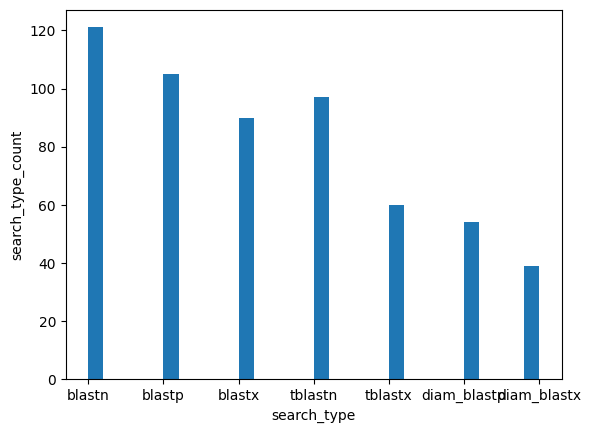

In [ ]:
plt.hist(df.search_type, bins=30)
plt.xlabel('search_type')
plt.ylabel('search_type_count')
plt.xticks()
plt.show()

**Notes**
1. How to decide the number of bins for a histogram? Sturge’s Rule: k=1+3.322*ln(n), where k is the number of bins and n is the number of unique observations in the dataset. https://accendoreliability.com/sturges-rule-method-selecting-number-bins-histogram/

**database**

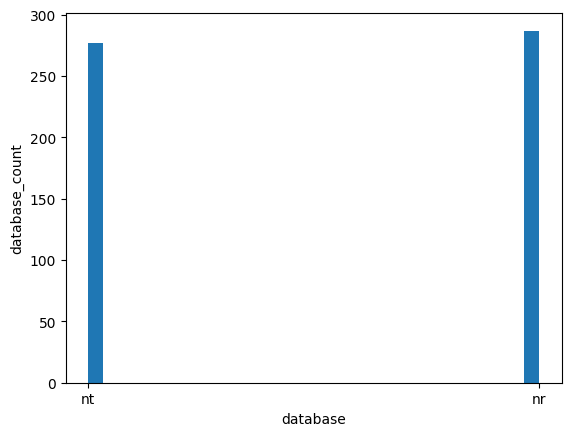

In [ ]:
plt.hist(df.database, bins=30)
plt.xlabel('database')
plt.ylabel('database_count')
plt.show()

**file_size**

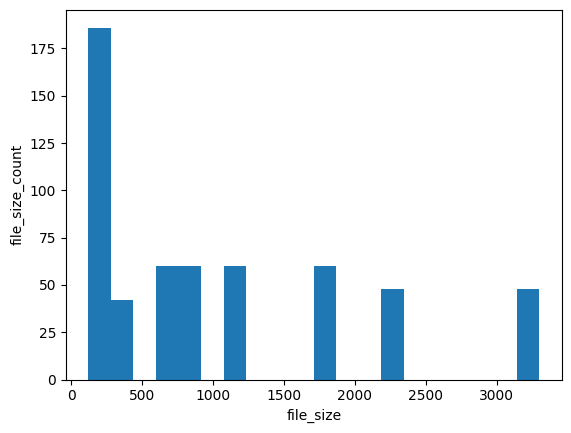

In [ ]:
plt.hist(df.file_size, bins=20)
plt.xlabel('file_size')
plt.ylabel('file_size_count')
plt.show()

**time _h**

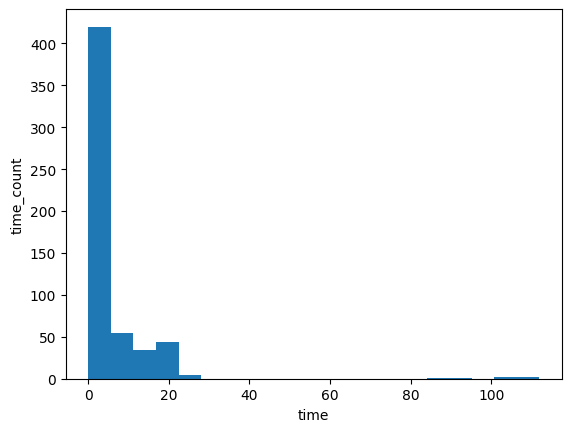

In [ ]:
plt.hist(df["time_h"], bins=20)
plt.xlabel('time')
plt.ylabel('time_count')
plt.show()

**cpu**

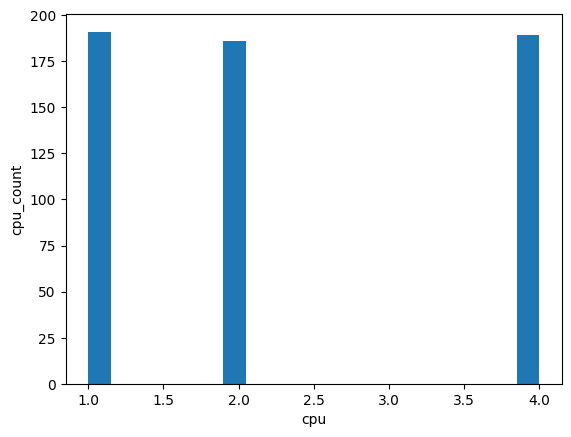

In [ ]:
plt.hist(df.cpu, bins=20)
plt.xlabel('cpu')
plt.ylabel('cpu_count')
plt.show()

**mem**

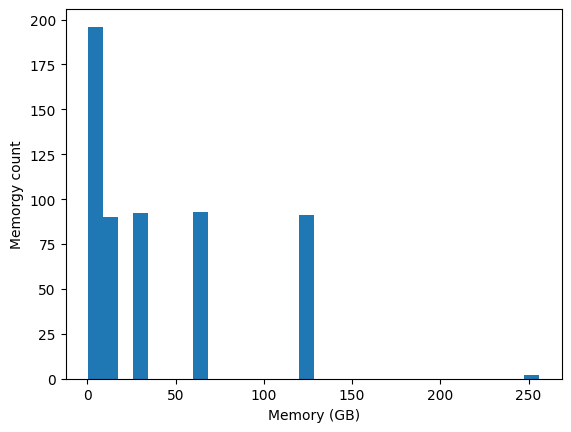

In [ ]:
plt.hist(df.mem, bins=30)
plt.xlabel('Memory (GB)')
plt.ylabel('Memorgy count')
plt.show()

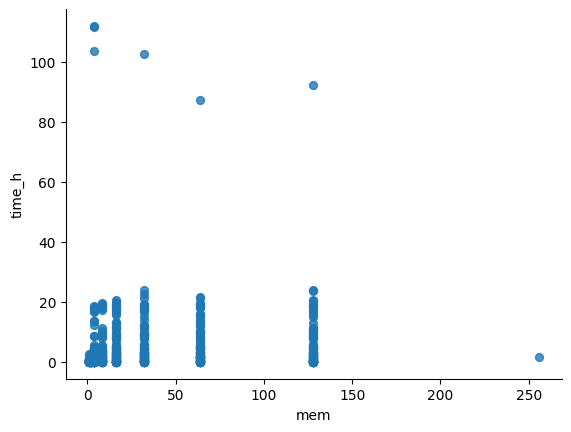

In [ ]:
df.plot(kind='scatter', x='mem', y='time_h', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## 1.4 Feature Engineering

## Catagorical Data Transformation

**Notes**

1. Categorical variables include nominal variables and ordinal variables.
2. Nominal variables are simply names while ordinal varibales can be ranked.

In [ ]:
# one hot encoding:

search_type_dum = pd.get_dummies(df.search_type)
search_type_dum

,blastn,blastp,blastx,diam_blastp,diam_blastx,tblastn,tblastx
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
561,0,0,0,0,1,0,0
562,0,0,0,0,1,0,0
563,0,0,0,0,1,0,0
564,0,0,0,0,1,0,0


In [ ]:
# adjust the columns order
search_type_dum = search_type_dum[['blastn', 'blastp', 'blastx', 'tblastn', 'tblastx', 'diam_blastp', 'diam_blastx']]
search_type_dum

,blastn,blastp,blastx,tblastn,tblastx,diam_blastp,diam_blastx
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
561,0,0,0,0,0,0,1
562,0,0,0,0,0,0,1
563,0,0,0,0,0,0,1
564,0,0,0,0,0,0,1


In [ ]:
database_dum = pd.get_dummies(df.database, prefix='db')
database_dum

,db_nr,db_nt
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
561,1,0
562,1,0
563,1,0
564,1,0


## Feature Selection

Every feature will be included to increase the model accuracy

In [ ]:
df_dum = pd.concat([search_type_dum,
                    database_dum,
                    df[['file_size', 'cpu', 'mem', "time_h"]]],
                   axis=1)

In [ ]:
df_dum

,blastn,blastp,blastx,tblastn,tblastx,diam_blastp,diam_blastx,db_nr,db_nt,file_size,cpu,mem,time_h
0,1,0,0,0,0,0,0,0,1,169,1,1.0,0.137778
1,1,0,0,0,0,0,0,0,1,169,1,2.0,0.082778
2,1,0,0,0,0,0,0,0,1,169,1,4.0,0.093333
3,1,0,0,0,0,0,0,0,1,169,1,8.0,0.081389
4,1,0,0,0,0,0,0,0,1,169,1,16.0,0.148056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,0,0,0,0,0,0,1,1,0,1100,4,8.0,NaN
562,0,0,0,0,0,0,1,1,0,1100,4,16.0,17.465000
563,0,0,0,0,0,0,1,1,0,1100,4,32.0,22.750556
564,0,0,0,0,0,0,1,1,0,1100,4,64.0,19.578611


In [ ]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   blastn       566 non-null    uint8  
 1   blastp       566 non-null    uint8  
 2   blastx       566 non-null    uint8  
 3   tblastn      566 non-null    uint8  
 4   tblastx      566 non-null    uint8  
 5   diam_blastp  566 non-null    uint8  
 6   diam_blastx  566 non-null    uint8  
 7   db_nr        566 non-null    uint8  
 8   db_nt        566 non-null    uint8  
 9   file_size    566 non-null    int64  
 10  cpu          566 non-null    int64  
 11  mem          564 non-null    float64
 12  time_h       562 non-null    float64
dtypes: float64(2), int64(2), uint8(9)
memory usage: 22.8 KB


drop NaN

In [ ]:
df_ready = df_dum.dropna()

In [ ]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 0 to 565
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   blastn       562 non-null    uint8  
 1   blastp       562 non-null    uint8  
 2   blastx       562 non-null    uint8  
 3   tblastn      562 non-null    uint8  
 4   tblastx      562 non-null    uint8  
 5   diam_blastp  562 non-null    uint8  
 6   diam_blastx  562 non-null    uint8  
 7   db_nr        562 non-null    uint8  
 8   db_nt        562 non-null    uint8  
 9   file_size    562 non-null    int64  
 10  cpu          562 non-null    int64  
 11  mem          562 non-null    float64
 12  time_h       562 non-null    float64
dtypes: float64(2), int64(2), uint8(9)
memory usage: 26.9 KB


# <font color='blue'><font size ='6'> 2. Modeling

### Section 2 objective:
* Data split
* model training & comparason
* potential hiperparameter tuning
* Model validation/test

## 2.1 Train/Test Split

In [ ]:
# split the whole dataset into train and test datasets

df_train, df_test = train_test_split(df_ready, test_size=0.2,random_state=2024, shuffle=True)

In [ ]:
# X_test, y_test ready.

target=['time_h']
features = list(df_dum.columns)
features = [e for e in features if e not in target]

X_train = df_train[features]
y_train = df_train[target]
X_test = df_test[features]
y_testvalid = df_test[target]

Note

1. `X_train`: data used for training the model
2. `y_train`: actual time_h for the `X_train` data points, used to evaluate the model's predictions during training
3. `X_test`: data set aside for validating the performance of the model after it has been trained
4. `y_test`: actual time_h for the `X_test` data, used to evaluate the model's predictions after it has been trained

In [ ]:
X_test.reset_index(drop = True)

,blastn,blastp,blastx,tblastn,tblastx,diam_blastp,diam_blastx,db_nr,db_nt,file_size,cpu,mem
0,1,0,0,0,0,0,0,0,1,1720,4,16.000
1,1,0,0,0,0,0,0,0,1,169,1,32.000
2,0,0,0,0,0,1,0,1,0,120,2,4.000
3,0,0,0,0,0,1,0,1,0,1100,2,128.000
4,0,0,1,0,0,0,0,1,0,169,4,16.000
...,...,...,...,...,...,...,...,...,...,...,...,...
108,0,1,0,0,0,0,0,1,0,120,1,0.512
109,0,1,0,0,0,0,0,1,0,120,1,1.000
110,0,0,1,0,0,0,0,1,0,3300,4,16.000
111,0,0,0,0,1,0,0,0,1,169,2,128.000


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 93 to 299
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   blastn       113 non-null    uint8  
 1   blastp       113 non-null    uint8  
 2   blastx       113 non-null    uint8  
 3   tblastn      113 non-null    uint8  
 4   tblastx      113 non-null    uint8  
 5   diam_blastp  113 non-null    uint8  
 6   diam_blastx  113 non-null    uint8  
 7   db_nr        113 non-null    uint8  
 8   db_nt        113 non-null    uint8  
 9   file_size    113 non-null    int64  
 10  cpu          113 non-null    int64  
 11  mem          113 non-null    float64
dtypes: float64(1), int64(2), uint8(9)
memory usage: 4.5 KB


In [ ]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 93 to 299
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time_h  113 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


## 2.2 Models Fitting and Prediction

### 2.2.1 Initial models screening

In [ ]:
def run_models(models, X_train, y_train, X_test, y_test):
    # input models is a dictionary of model_class instances
    model_metrics=[]
    for key, model in models.items(): # must use .itesm()
        steps = [('scaler', StandardScaler()),
                 (str(key), model)]
        pipe = Pipeline(steps)

        pipe.fit(X_train, y_train)
        y_train_pred = pipe.predict(X_train)
        y_test_pred = pipe.predict(X_test)

        mec_results = []

        mec_results.append(round(abs(cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')).mean(), 3))
        mec_results.append(round(abs(cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean(), 3))
        mec_results.append(round(cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2').mean(), 3))

        mec_results.append(round(mean_absolute_error(y_test, y_test_pred), 3))
        mec_results.append(round(mean_squared_error(y_test, y_test_pred), 3))
        mec_results.append(round(r2_score(y_test, y_test_pred), 3))

        model_metrics.append(mec_results)

    indx = [key for key in models.keys()] #intent to get the keys
    table = pd.DataFrame(model_metrics,
                         columns = ['MAE_train', 'MSE_train', 'R2_train', 'MAE_test', 'MSE_test', 'R2_test',],
                         index = indx)
    return table

In [ ]:
models = {'lr': LinearRegression(),
          'knn': KNeighborsRegressor(),
          'dtr': DecisionTreeRegressor(),
          'rfr': RandomForestRegressor(),
          'xgbr': XGBRegressor()}
run_models(models, X_train, y_train, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

,MAE_train,MSE_train,R2_train,MAE_test,MSE_test,R2_test
lr,4.007,67.313,0.372,4.485,128.175,0.420
knn,1.937,50.404,0.646,1.919,45.739,0.793
dtr,0.695,4.565,0.954,0.745,2.119,0.990
rfr,0.575,2.671,0.978,0.754,3.964,0.982
xgbr,0.666,2.911,0.969,0.779,2.952,0.987


Note:

XGBoost regression shows high r2 scores for both train and test datasets

## 2.2.2 Select XGBOOST

In [ ]:
model_xgbr = Pipeline([('scaler', StandardScaler()),
                      ('xgbr', XGBRegressor())])
model_xgbr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgbr',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
y_train_pred=model_xgbr.predict(X_train)
y_test_pred=model_xgbr.predict(X_test)

In [ ]:
model_metrics = []
mec_results = []
mec_results.append(round(abs(cross_val_score(model_xgbr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')).mean(), 3))
mec_results.append(round(abs(cross_val_score(model_xgbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean(), 3))
mec_results.append(round(cross_val_score(model_xgbr, X_train, y_train, cv=5, scoring='r2').mean(), 3))
mec_results.append(round(mean_absolute_error(y_test, y_test_pred), 3))
mec_results.append(round(mean_squared_error(y_test, y_test_pred), 3))
mec_results.append(round(r2_score(y_test, y_test_pred), 3))

model_metrics.append(mec_results)

table = pd.DataFrame(model_metrics,
                 columns = ['MAE_train', 'MSE_train', 'R2_train', 'MAE_test', 'MSE_test', 'R2_test',],
                 index = ['linear regression'])
table

,MAE_train,MSE_train,R2_train,MAE_test,MSE_test,R2_test
linear regression,0.666,2.911,0.969,0.779,2.952,0.987


visualize the prediction and ground truth

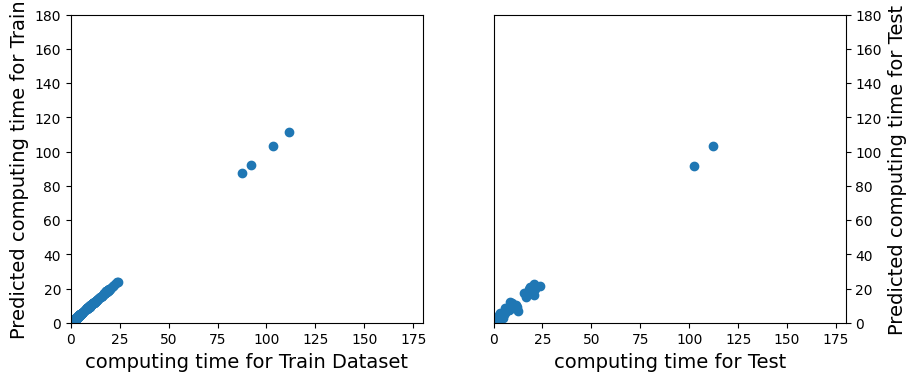

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(y_train, y_train_pred)
ax2.scatter(y_test, y_test_pred)
ax1.set_xlabel('computing time for Train Dataset', size = 14)
ax1.set_ylabel('Predicted computing time for Train', size = 14)
ax2.set_xlabel('computing time for Test', size = 14)
ax2.set_ylabel('Predicted computing time for Test', size = 14)
ax1.set_xlim(0, 180)
ax1.set_ylim(0, 180)
ax2.set_xlim(0, 180)
ax2.set_ylim(0, 180)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.show()

**HyperParameter tunning**

# <font color='blue'> <font size ='6'> 3 Model depolyment

The model is created to predict time by inputing CPU and MEM etc


In [ ]:
import pickle
pickle.dump(model_xgbr, open('drive/MyDrive/models/hpg_cal_model_xgbr.pkl', 'wb'))

# tests

In [ ]:
data = {"blastn": [0],
        "blastp":[0],
        "blastx":[1],
        "tblastn":[0],
        "tblastx":[0],
        "diam_blastp":[0],
        "diam_blastx":[0],
        "db_nr":[1],
        "db_nt":[0],
        "file_size":[2380],
        "cpu":[1],
        "mem":[32]}

In [ ]:
dfp = pd.DataFrame(data)
dfp

,blastn,blastp,blastx,tblastn,tblastx,diam_blastp,diam_blastx,db_nr,db_nt,file_size,cpu,mem
0,0,0,1,0,0,0,0,1,0,238,1,32


In [ ]:
prediction = model_xgbr.predict(dfp)

In [ ]:
prediction[0]

0.5806135